# **Detección de intrusiones de ciberseguridad **

**Para detectar intrusiones cibernéticas en función del tráfico de red y el comportamiento del usuario**

Contiene 9,537 registros de actividad de red

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
train= pd.read_csv("/content/cybersecurity_intrusion_data.csv")
train.head(10)


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,SID_00006,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,SID_00007,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,SID_00008,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,SID_00009,406,TCP,2,542.558895,NaN,0.294580,0,Chrome,1,0
9,SID_00010,608,UDP,6,531.944107,NaN,0.424117,1,Chrome,0,0


In [ ]:
# qué tamaño tienen los datos?
print(train.shape)
# hay valores nulos en los datos?
print(train.info())

train.groupby(['attack_detected']).count()["session_id"]

(9537, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None


,session_id
attack_detected,
0,5273
1,4264


In [ ]:
# Fill NaN values
imputer = SimpleImputer(strategy="most_frequent")
train[['encryption_used']] = imputer.fit_transform(train[['encryption_used']])
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      9537 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None


In [ ]:
def analizar_caracteristica(df, columna):
    ataques = train[train['attack_detected'] == 1]
    resultados = {}

    if pd.api.types.is_numeric_dtype(train[columna]):  # Si es numérica
        minimo = ataques[columna].min()
        promedio = ataques[columna].mean()
        maximo = ataques[columna].max()
        resultados['tipo'] = 'numérica'
        resultados['minimo'] = minimo
        resultados['promedio'] = promedio
        resultados['maximo'] = maximo
    elif isinstance(train[columna].dtype, pd.CategoricalDtype) or train[columna].dtype == 'object':  # Si es categórica o 'object'
        mas_usada = ataques[columna].mode()[0]
        cantidad_mas_usada = ataques[columna].value_counts().iloc[0]
        resultados['tipo'] = 'categórica'
        resultados['mas_usada'] = mas_usada
        resultados['cantidad_mas_usada'] = cantidad_mas_usada
    else:
        resultados['tipo'] = 'otro'

    return resultados

# Analiza cada característica
resultados_por_caracteristica = {}
for columna in train.columns:
    if columna != 'attack_detected':  # No analizamos la variable objetivo
        resultados = analizar_caracteristica(train, columna)
        resultados_por_caracteristica[columna] = resultados

# Muestra los resultados
for columna, resultados in resultados_por_caracteristica.items():
    print(f"Característica: {columna}")
    if resultados['tipo'] == 'numérica':
        print(f"  Mínimo: {resultados['minimo']}")
        print(f"  Promedio: {resultados['promedio']}")
        print(f"  Máximo: {resultados['maximo']}")
    elif resultados['tipo'] == 'categórica':
        print(f"  Más usado en ataques: {resultados['mas_usada'],resultados['cantidad_mas_usada']}")

    print("-" * 30)

Característica: session_id
  Más usado en ataques: ('SID_00001', 1)
------------------------------
Característica: network_packet_size
  Mínimo: 64
  Promedio: 498.93105065666043
  Máximo: 1270
------------------------------
Característica: protocol_type
  Más usado en ataques: ('TCP', 2963)
------------------------------
Característica: login_attempts
  Mínimo: 1
  Promedio: 4.637429643527205
  Máximo: 13
------------------------------
Característica: session_duration
  Mínimo: 0.5
  Promedio: 829.1319799093333
  Máximo: 7141.336086110276
------------------------------
Característica: encryption_used
  Más usado en ataques: ('AES', 2965)
------------------------------
Característica: ip_reputation_score
  Mínimo: 0.0024968331802346
  Promedio: 0.373014583069066
  Máximo: 0.924299191969215
------------------------------
Característica: failed_logins
  Mínimo: 0
  Promedio: 1.9359756097560976
  Máximo: 5
------------------------------
Característica: browser_type
  Más usado en ataques:

Estos ya serían los datos con los que vamos a hacer modelos

In [ ]:
# variable dependiente
Y_train = train['attack_detected']

# preprocesamiento de variables independientes
features = ['network_packet_size','login_attempts', 'session_duration', 'failed_logins', 'unusual_time_access']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(9537,) (9537, 5)


Modelo para encontrar patrones y hacer predicciones
regresión logistica: para predecir si pertenece a una categoria u otra

In [ ]:
# entrenando modelo regresión logistica
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

Evaluación
Aquí vamos a hacer una matriz de confusión y evaluar
que tan bueno es cada modelo

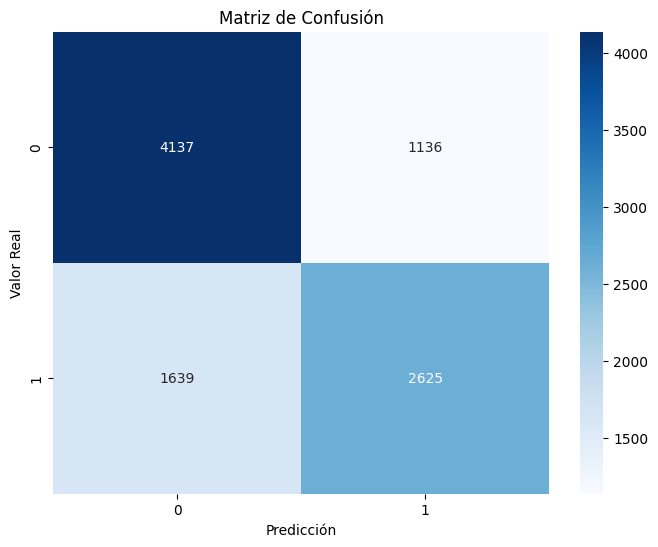

Precisión del modelo: 0.709027996225228


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
# (tu código anterior para cargar los datos, dividirlos en entrenamiento y prueba, y entrenar el modelo)

# Predecir en el conjunto de prueba
y_pred = logreg.predict(X_train)

# Crear la matriz de confusión
cm = confusion_matrix(Y_train, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Calcular la precisión
accuracy = accuracy_score(Y_train, y_pred)
print("Precisión del modelo:", accuracy)